In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    def plot_data(self, X):
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
        plt.show()
        
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')
        
    def plot_classified_data(self, X):
        xx, yy = np.meshgrid(
            np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
            np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
        Z = self.predict_proba(XX)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

In [2]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


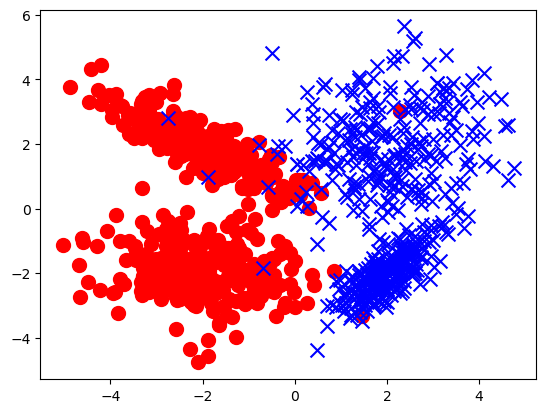

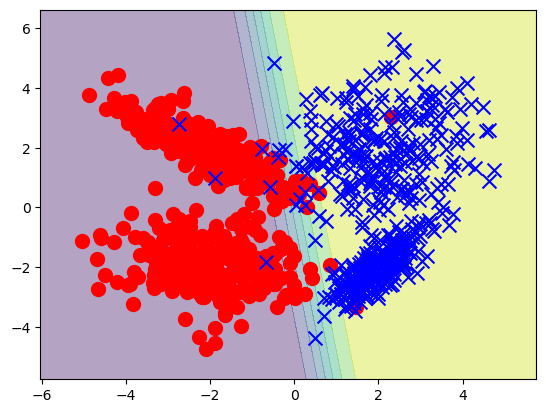

accuracy = 0.98
F1-score = 0.98


In [4]:
logreg = LogReg()

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

# 1 Выведите результаты работы библиотечной модели - в численном и в графическом виде.

0.976

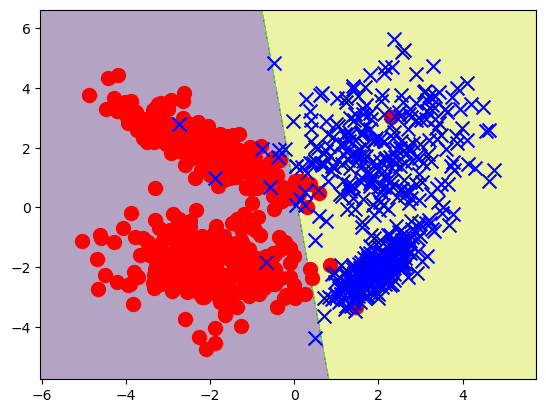

In [5]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)



model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

display(model.score(X,y))

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))


XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

# 2 Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\387536934.py:33: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


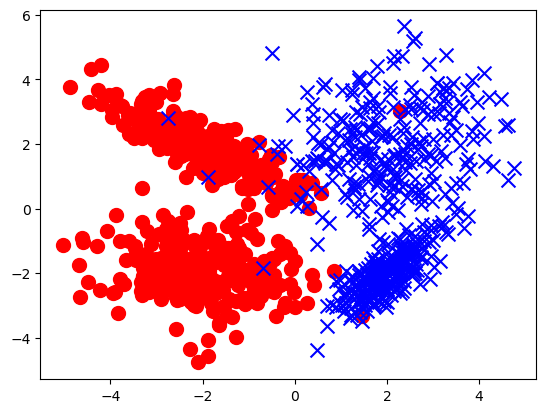

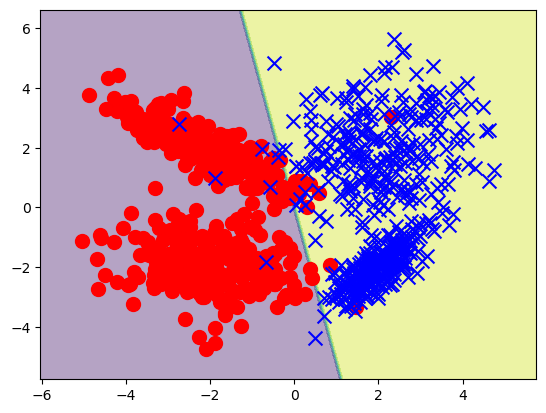

accuracy = 0.98
F1-score = 0.98


In [6]:
logreg = LogReg(alpha=100)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

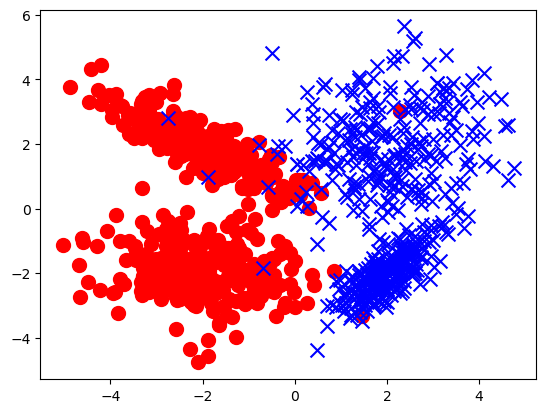

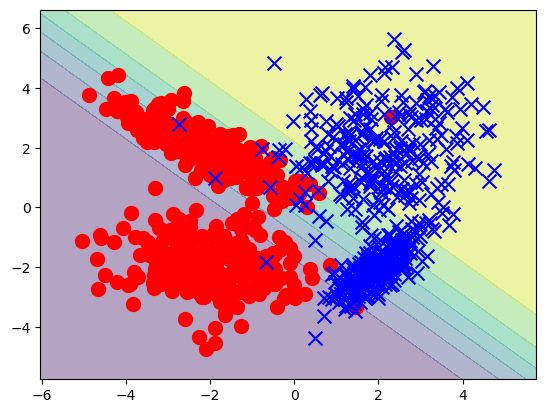

accuracy = 0.75
F1-score = 0.75


In [7]:
logreg = LogReg(alpha=0.00001)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

# 3 Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [8]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        return X
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):

        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

In [9]:
logreg = LogReg(alpha=91)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

X = logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.score(X,y)

accuracy = 0.98
F1-score = 0.98


# 4 Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [10]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    def plot_data(self, X):
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
        plt.show()
        
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')
        
    def plot_classified_data(self, X):
        xx, yy = np.meshgrid(
            np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
            np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
        Z = self.predict_proba(XX)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

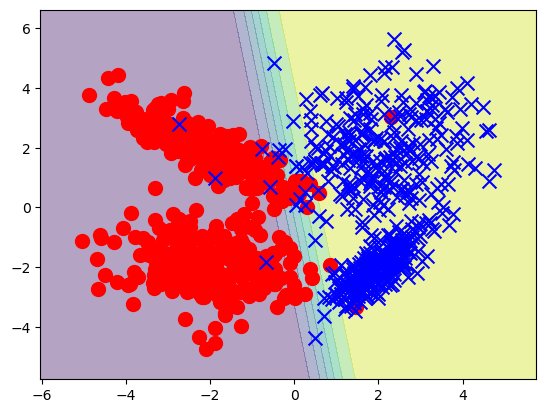

accuracy = 0.98
F1-score = 0.98
2


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


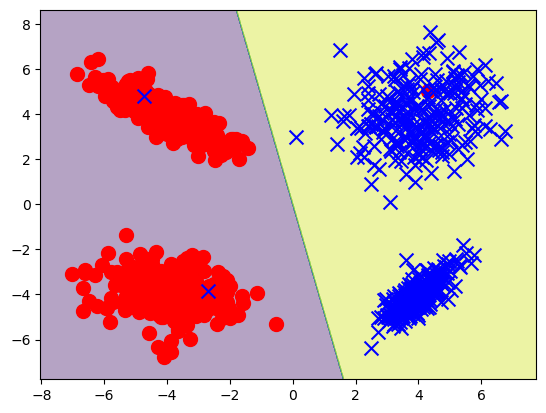

accuracy = 1.00
F1-score = 1.00
4


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


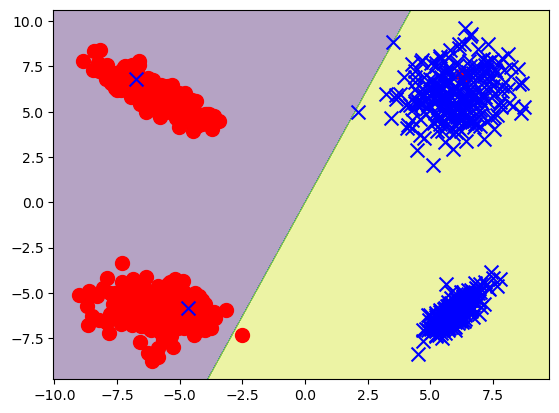

accuracy = 1.00
F1-score = 1.00
6


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


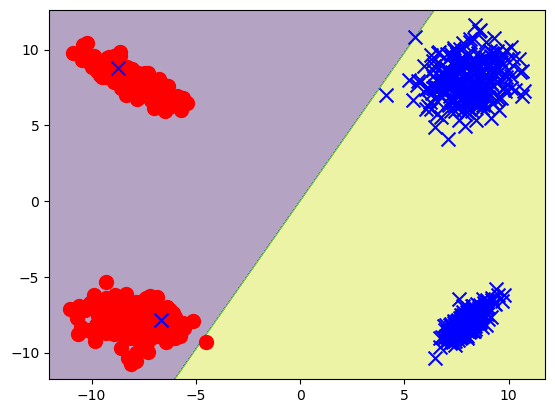

accuracy = 0.99
F1-score = 1.00
8


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


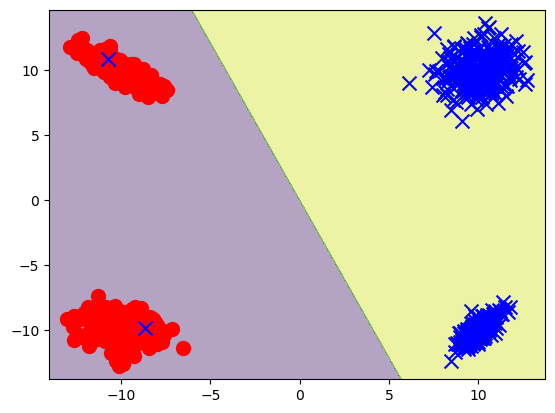

accuracy = 1.00
F1-score = 1.00
10


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


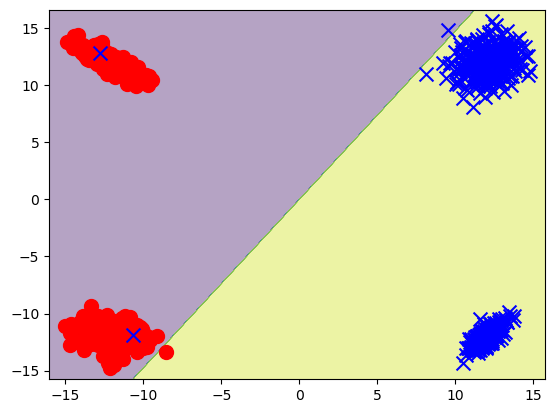

accuracy = 0.99
F1-score = 1.00
12


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


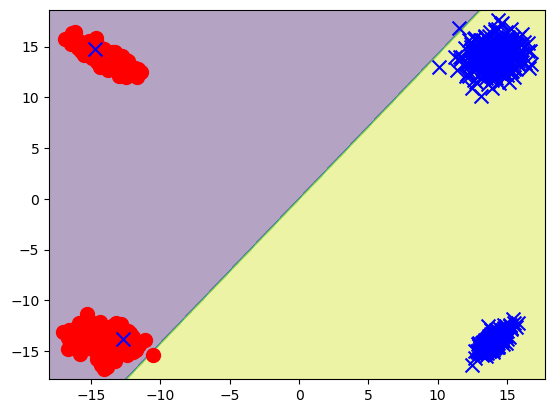

accuracy = 0.99
F1-score = 1.00
14


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


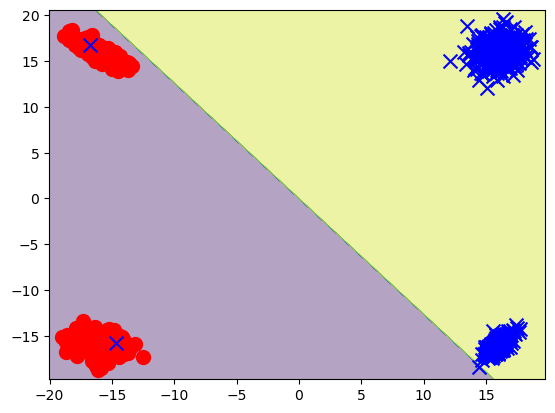

accuracy = 1.00
F1-score = 1.00
16


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


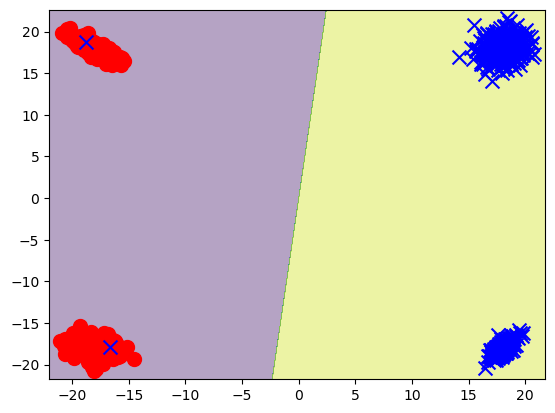

accuracy = 1.00
F1-score = 1.00
18


C:\Users\ivant\AppData\Local\Temp\ipykernel_34372\3702488993.py:26: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


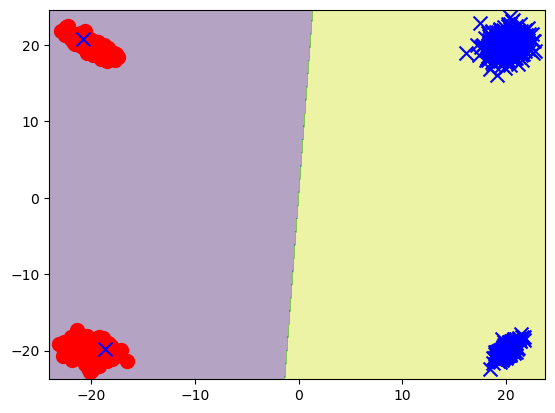

accuracy = 1.00
F1-score = 1.00
20


In [11]:
logreg = LogReg(alpha=80)
for i in range(2,21,2):
    X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=i,
                            random_state=1)

    logreg.fit(X, y)
    y_pred = logreg.predict(X)
    #logreg.plot_data(X)
    #plt.show()
    logreg.plot_classified_data(X)
    plt.show()
    logreg.score(X,y)
    print(i)

Чем больше параметр `class_sep`, тем кучнее расположены данные

# 5 Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [18]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        return X
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):

        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(X, y):
        n_classes = len(set(y))
        classes_proba = []
        y_all_classes = y
        for n in range(n_classes):
            converter_num = lambda x: int(x==n)
            y_single_class = [converter_num(x) for x in y_all_classes]
            logreg = LogReg()
            logreg.fit(X, y_single_class)
            y_pred_proba = logreg.predict_proba(X)
            classes_proba.append(y_pred_proba)
            
        classes_proba = np.array(classes_proba).transpose()
        classes_proba_rez = classes_proba.argmax(axis=1)
        return classes_proba_rez
    
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred,average='micro')
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

In [19]:
logreg = LogReg(alpha=0.1)
X,y = make_classification (n_samples=100,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=4,
                          random_state=1)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
logreg.fit(X, y)
y_pred = logreg.predict(X)
#logreg.plot_data(X)
#plt.show()
#logreg.plot_classified_data(X)
#plt.show()
logreg.score(X,y)

average='binary'

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'